# IT salaries project

### This is a project which is a test case for my data science jurney.
<b> Created by Dezső Szabolcs </b>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Importing the packages from my Python library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the external CSV file and document it

In [3]:
salaries_df = pd.read_csv("data/ds_salaries.csv")

**Replacing the dataset index**

In [4]:
salaries_df.index.names = ['ID']

In [5]:
salaries_df = salaries_df.drop('Unnamed: 0', axis = 1)


In [6]:
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
ID,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


**Attributes of the dataset:**
- ID
- Work Year
- Experience level
- Employment Type
- Job Title
- Salary
- Salary Currency
- Salary in USD
- Employee Residence
- Remote Ratio
- Company Location
- Company Size

### Some basic statistics about the data

In [7]:
salaries_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [25]:
salaries_df.shape

(607, 11)

### Cleaning the data if there is some NaN or NULL value

In [26]:
pd.isna(salaries_df).sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [33]:
salaries_df.dropna(inplace = True)

## Visualization
![separator1](https://i.imgur.com/ZUWYTii.png)

**Making a chart which represents the salaries of the three main field of data jobs**

Slice the main DataFrame into three separate DataFrame

In [91]:
data_scientists = salaries_df[salaries_df["job_title"].str.contains("Data Scientist")]
data_analysts = salaries_df[salaries_df["job_title"].str.contains("Data Analyst")]
data_engineers = salaries_df[salaries_df["job_title"].str.contains("Data Engineer")].copy()

Filter the Big Data Engineers from the Data Engineers DataFrame

In [93]:
data_engineers[data_engineers['job_title'].str.contains('Big') == True]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
ID,,,,,,,,,,,
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
17,2020,SE,FT,Big Data Engineer,100000,EUR,114047,PL,100,GB,S
31,2020,EN,FT,Big Data Engineer,70000,USD,70000,US,100,US,L
120,2021,MI,FT,Big Data Engineer,60000,USD,60000,ES,50,RO,M
180,2021,MI,FT,Big Data Engineer,1672000,INR,22611,IN,0,IN,L
192,2021,MI,FT,Big Data Engineer,18000,USD,18000,MD,0,MD,S
213,2021,EN,FT,Big Data Engineer,435000,INR,5882,IN,0,CH,L
230,2021,EN,FT,Big Data Engineer,1200000,INR,16228,IN,100,IN,L


In [94]:
drop_index = (data_engineers[data_engineers['job_title'].str.contains('Big') == True]).index

In [95]:
data_engineers.drop(index = drop_index, inplace = True)

The edited DataFrame with only the "original" Data Engineers data

In [97]:
data_engineers

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
ID,,,,,,,,,,,
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S
16,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S
19,2020,MI,FT,Lead Data Engineer,56000,USD,56000,PT,100,US,M
22,2020,SE,FT,Data Engineer,42000,EUR,47899,GR,50,GR,L
27,2020,SE,FT,Data Engineer,720000,MXN,33511,MX,0,MX,S
...,...,...,...,...,...,...,...,...,...,...,...
579,2022,SE,FT,Data Engineer,25000,USD,25000,US,100,US,M
582,2022,SE,FT,Data Engineer,220110,USD,220110,US,100,US,M
583,2022,SE,FT,Data Engineer,160080,USD,160080,US,100,US,M


The unique job titles in every DataFrame that I created earlier

In [102]:
data_engineers['job_title'].unique()

array(['Lead Data Engineer', 'Data Engineer', 'Data Engineering Manager',
       'Cloud Data Engineer', 'Director of Data Engineering',
       'Principal Data Engineer'], dtype=object)

In [103]:
data_scientists['job_title'].unique()

array(['Data Scientist', 'Lead Data Scientist',
       'Principal Data Scientist', 'Applied Data Scientist',
       'Staff Data Scientist'], dtype=object)

In [104]:
data_analysts['job_title'].unique()

array(['Product Data Analyst', 'Data Analyst', 'Business Data Analyst',
       'Lead Data Analyst', 'BI Data Analyst', 'Marketing Data Analyst',
       'Financial Data Analyst', 'Finance Data Analyst',
       'Principal Data Analyst'], dtype=object)

In [115]:
data_engineer_avg_salary = data_engineers['salary'].mean()

In [117]:
data_scientist_avg_salary = data_scientists['salary'].mean()

In [118]:
data_analysts_avg_salary = data_analysts['salary'].mean()

In [116]:
data_engineer_avg_salary

177628.61333333334

In [119]:
data_scientist_avg_salary

493161.320754717

In [120]:
data_analysts_avg_salary

215545.82352941178

In [128]:
bar_salary_names_avg = ["Data Analyst", "Data Engineer", "Data Scientist"]

In [129]:
bar_salary_avg = [data_analysts_avg_salary, data_engineer_avg_salary, data_scientist_avg_salary]

<BarContainer object of 3 artists>

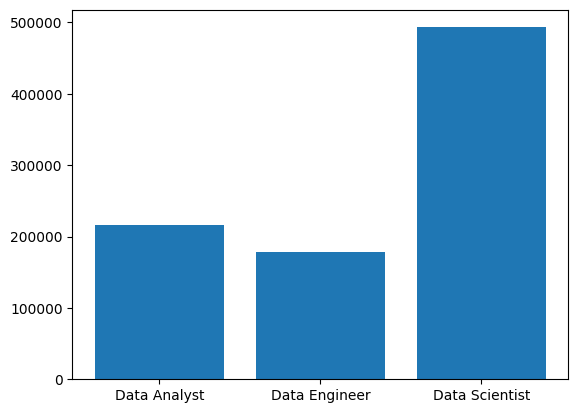

In [131]:
plt.bar(x = bar_salary_names_avg, height = bar_salary_avg)